In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib import gridspec
import seaborn as sns
import os
from pathlib import Path
import itertools
import sys
import pickle
sys.path.append(os.path.join(Path(os.getcwd()).parents[0], "functions"))
import warnings
warnings.filterwarnings('ignore')
import plotting_functions as plfn
import helper_functions as hfn
import AIC_functions as aicfn

In [2]:
from lmfit import Model
from lmfit.models import PowerLawModel
from lmfit.models import LinearModel
from lmfit.models import QuadraticModel

In [3]:
model_lm = LinearModel()
model_pl = PowerLawModel()
model_quad = QuadraticModel()

In [4]:
# colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
# sns.set_palette = sns.xkcd_palette(colors)
sns.set_style("ticks")
hfont = {'fontname':'Myriad Pro'}

In [5]:
path = Path(os.getcwd()).parents[0]

prob_path = os.path.join(path, 'data/network_models/probabilistic_model')

distrpath = os.path.join(prob_path, 'params_distr')

datapath = os.path.join(distrpath, 'analysis')
rawdatapath = os.path.join(distrpath, 'data')

datapath_df = os.path.join(datapath, 'DF')

figpath = os.path.join(path, 'figures')
hfn.dir_check(figpath)

figs12path = os.path.join(figpath, 'FigS4')
hfn.dir_check(figs12path)

figs12panelpaths = os.path.join(figs12path, 'panels')
hfn.dir_check(figs12panelpaths)


# homogeneous parameters

In [6]:
with open (os.path.join(distrpath, 'listp.pickle'), 'rb') as fp:
    listp = pickle.load(fp)
with open (os.path.join(distrpath, 'listni.pickle'), 'rb') as fp:
    listni = pickle.load(fp)

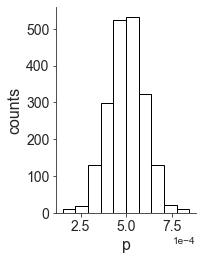

In [7]:
fig=plt.figure(figsize = (2.7,3.5), constrained_layout = True)
plt.hist(listp, bins = 10, color ='white', edgecolor='k')
plt.xlabel('p', fontsize = 16)
plt.ylabel('counts', fontsize = 16)
ax = fig.gca()
plt.locator_params(axis='x', nbins=2)
ax.ticklabel_format(style='sci', scilimits=(0,0), axis='x')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False) 
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
plt.savefig(os.path.join(figs12panelpaths, 'figS4_a1.png'), bbox_inches = 'tight')
plt.savefig(os.path.join(figs12panelpaths, 'figS4_a1.eps'), bbox_inches = 'tight', format = 'eps')

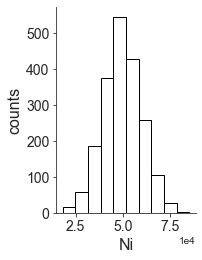

In [8]:
fig=plt.figure(figsize = (2.7,3.5), constrained_layout = True)
plt.hist(listni, bins = 10, color ='white', edgecolor='k')
plt.xlabel('Ni', fontsize = 16)
plt.ylabel('counts', fontsize = 16)
ax = fig.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False) 
plt.locator_params(axis='x', nbins=2)
ax.ticklabel_format(style='sci', scilimits=(0,0), axis='x')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
plt.savefig(os.path.join(figs12panelpaths, 'figS4_a2.png'), bbox_inches = 'tight')
plt.savefig(os.path.join(figs12panelpaths, 'figS4_a2.eps'), bbox_inches = 'tight', format = 'eps')

# p and ni from distribution

In [9]:
thisfile = os.path.join(rawdatapath, 'df_res_0.h5')
thisdf = pd.read_hdf(os.path.join(path, thisfile))
thisdf = thisdf.sort_values(by=['starters'])
thisdf2 = thisdf[(thisdf != 0).all(1)]
thisdf_log = np.log10(thisdf2)

In [10]:
df_fit_pl,result_pl, pars_pl, AICc_pl, rsquare_pl = aicfn.fit_and_saveprms_noplot(thisdf['starters'].values, thisdf['inputs'].values, 'inputs', model_pl, 'linear scale, power-law fit', 'sample_linscale_plfit' , datapath, 0, 3200, 1, 0)
df_fit_lm,result_lm, pars_lm, AICc_lm, rsquare_lm = aicfn.fit_and_saveprms_noplot(thisdf['starters'].values, thisdf['inputs'].values, 'inputs', model_lm, 'linear scale, linear fit', 'sample_linscale_lmfit' , datapath, 0, 3200, 1, 0)
df_fit_quad,result_quad, pars_quad, AICc_quad, rsquare_quad = aicfn.fit_and_saveprms_noplot(thisdf['starters'].values, thisdf['inputs'].values, 'inputs', model_quad, 'linear scale, quadratic fit', 'sample_linscale_quadfit' , datapath, 0, 3200, 1, 0)


In [11]:
thisdf_AIC_lin = pd.DataFrame([df_fit_lm.AICc.values[0], df_fit_pl.AICc.values[0], df_fit_quad.AICc.values[0]]).T
thisdf_AIC_lin.columns = ['linear', 'power-law', 'quadratic']
thisdf_AIC_lin['iteration'] = 0

In [12]:
df_fit_lm_log,result_lm_log, pars_lm_log, AICc_lm_log, rsquare_lm_log = aicfn.fit_and_saveprms_noplot(thisdf_log['starters'].values, thisdf_log['inputs'].values, 'inputs', model_lm, 'log scale, linear fit', 'sample_logscale_lmfit', datapath, 0, 4, 1, 1)
df_fit_quad_log,result_quad_log, pars_quad_log, AICc_quad_log, rsquare_quad_log = aicfn.fit_and_saveprms_noplot(thisdf_log['starters'].values, thisdf_log['inputs'].values, 'inputs', model_quad, 'log scale, quadratic fit', 'sample_logscale_quadfit' , datapath, 0, 4, 1, 1)
thisdf_AIC_log = pd.DataFrame([df_fit_lm_log.AICc.values[0],  df_fit_quad_log.AICc.values[0]]).T
thisdf_AIC_log.columns = ['linear', 'quadratic']

[[Model]]
    Model(powerlaw)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 17
    # data points      = 215
    # variables        = 2
    chi-square         = 1.4197e+09
    reduced chi-square = 6665223.25
    Akaike info crit   = 3380.15965
    Bayesian info crit = 3386.90093
    R-squared          = 0.85001116
[[Variables]]
    amplitude:  34.1634596 +/- 9.65753285 (28.27%) (init = 26.9163)
    exponent:   0.92358629 +/- 0.04300647 (4.66%) (init = 0.9588536)
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, exponent) = -0.999


findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro'

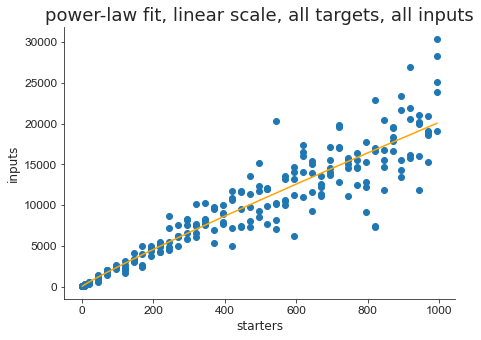

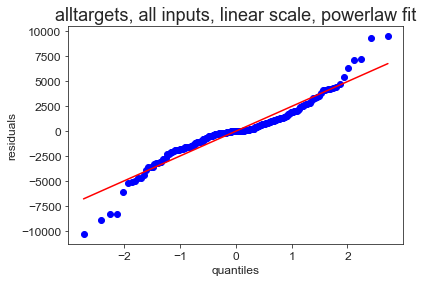

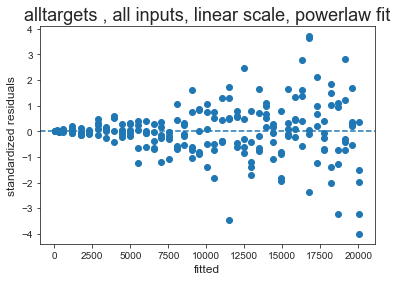

findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.


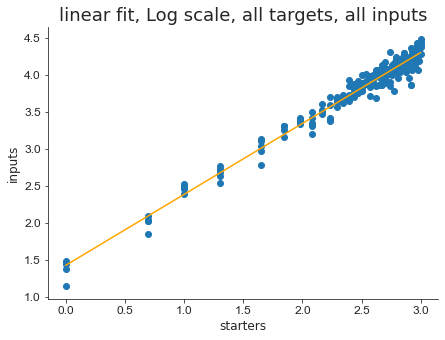

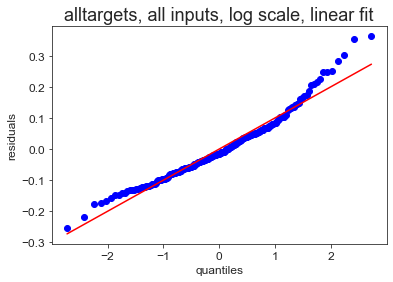

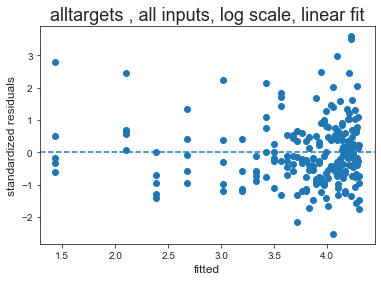

In [13]:
thisdf.columns =['starter', 'input', 'p']
thisdf2.columns =['starter', 'input', 'p']
df_results_all_pl = aicfn.analyze_residuals(thisdf, datapath, datapath, ['input'], 1, 0)
df_results_all_lm = aicfn.analyze_residuals(thisdf2, datapath, datapath, ['input'], 0, 0)

In [14]:
df_AIC_res = pd.concat([df_results_all_lm['area'], df_results_all_lm['AICc'], df_results_all_pl['AICc']], keys = ['area', 'log-normal res', 'normal res'], axis = 1)
df_AIC_res.drop(['area'], axis=1)

,log-normal res,normal res
0,3726.571458,3992.416965


In [15]:
colors = ["amber"]
sns.set_palette = sns.xkcd_palette(colors)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


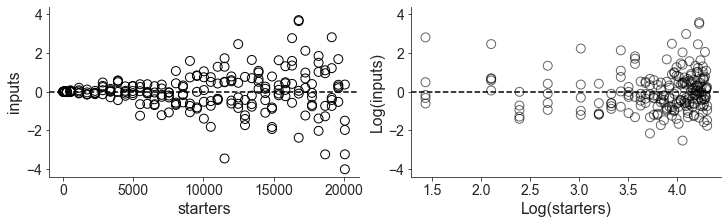

In [16]:
f1=plt.figure(figsize = (10,3), constrained_layout = True)

gs = f1.add_gridspec(1,4)

    # panel A
ax1 = f1.add_subplot(gs[:, :2])

ax1.scatter(result_pl.best_fit, result_pl.residual/np.std(result_pl.residual), facecolors = 'none', s= 80, edgecolors='k')
ax1.set_ylabel('standardized res.',fontsize = 16)
ax1.set_xlabel('fitted values',fontsize = 16)

x1, x2 = ax1.get_xlim()
max_ax1 = max(np.abs(ax1.get_ylim()))
ax1.set_ylim((-max_ax1, max_ax1))
ax1.axhline(y=0, xmin=0, xmax=x2,c='k', ls='--')
ax1.set_ylabel('inputs', fontsize = 16)
ax1.set_xlabel('starters', fontsize = 16)
plt.locator_params(axis='x', nbins=5)
ax2 = f1.add_subplot(gs[:, 2:])
ax2.scatter(result_lm_log.best_fit, result_lm_log.residual/np.std(result_lm_log.residual),facecolors = 'none', alpha = 0.6, s= 80, edgecolors='k')
ax2.set_ylabel('standardized res.',fontsize = 16)
ax2.set_xlabel('fitted values',fontsize = 16)

x1, x2 = ax2.get_xlim()
max_ax2 = max(np.abs(ax2.get_ylim()))
ax2.set_ylim((-max_ax1, max_ax1))
ax2.axhline(y=0, xmin=0, xmax=x2,c='k', ls='--')
ax2.set_ylabel('Log(inputs)', fontsize = 16)
ax2.set_xlabel('Log(starters)', fontsize = 16)

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False) 

ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False) 
for label in (ax1.get_xticklabels() + ax1.get_yticklabels() + ax2.get_xticklabels() + ax2.get_yticklabels()):
    label.set_fontsize(14)
    
plt.savefig(os.path.join(figs12panelpaths, 'figS4_b2.png'), bbox_inches = 'tight')
plt.savefig(os.path.join(figs12panelpaths, 'figS4_b2.eps'), bbox_inches = 'tight', format = 'eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


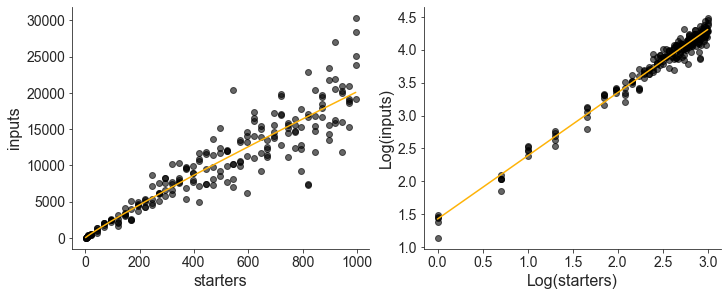

In [17]:
f1=plt.figure(figsize = (10,4), constrained_layout = True)

gs = f1.add_gridspec(1,4)

    # panel A
ax1 = f1.add_subplot(gs[:, :2])

ax1.plot(thisdf.starter, thisdf.input, 'o', color = 'k', alpha = 0.6)
ax1.plot(thisdf.starter, result_pl.best_fit, c = sns.xkcd_palette(colors)[0])
ax1.set_ylabel('inputs', fontsize = 16)
ax1.set_xlabel('starters', fontsize = 16)

ax2 = f1.add_subplot(gs[:, 2:])
ax2.plot(thisdf_log.starters, thisdf_log.inputs, 'o', color = 'k', alpha = 0.6)
ax2.plot(thisdf_log.starters, result_lm_log.best_fit, c = sns.xkcd_palette(colors)[0])
ax2.set_ylabel('Log(inputs)', fontsize = 16)
ax2.set_xlabel('Log(starters)', fontsize = 16)

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False) 

ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False) 
for label in (ax1.get_xticklabels() + ax1.get_yticklabels() + ax2.get_xticklabels() + ax2.get_yticklabels()):
    label.set_fontsize(14)
    

plt.savefig(os.path.join(figs12panelpaths, 'figS4_b1.png'), bbox_inches = 'tight')
plt.savefig(os.path.join(figs12panelpaths, 'figS4_b1.eps'), bbox_inches = 'tight', format = 'eps')    


In [18]:
AIC_res = pd.read_hdf(os.path.join(datapath, 'delta_AIC_random.h5' ))

In [19]:
AIC_res_lin = pd.read_hdf(os.path.join(datapath, 'delta_AIC_lin_random.h5' ))
AIC_res_log = pd.read_hdf(os.path.join(datapath, 'delta_AIC_log_random.h5' ))

In [20]:
AIC_res['deltaAIC'] = AIC_res['log-normal res'] - AIC_res['normal res']

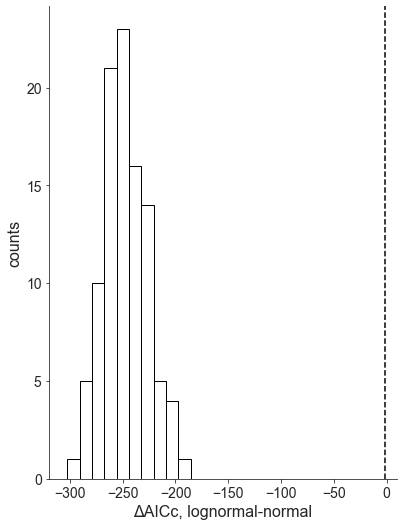

In [21]:
plt.figure(figsize = (5.5,7.2), constrained_layout = True)
plt.hist(AIC_res['deltaAIC'], bins = 10, color ='white', edgecolor='k')
plt.axvline(-2, c='k', ls= '--')
plt.xlabel('ΔAICc, lognormal-normal', fontsize = 16)
plt.ylabel('counts', fontsize = 16)
ax = plt.gca()
ax.set_xlim(-320, 10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False) 
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
plt.savefig(os.path.join(figs12panelpaths, 'figS4_c.png'), bbox_inches = 'tight')
plt.savefig(os.path.join(figs12panelpaths, 'figS4_c.eps'), bbox_inches = 'tight', format = 'eps')